In [218]:
# !pip install yfinance
import yfinance as yf

In [219]:
sp500 = yf.Ticker("^GSPC")

In [220]:
sp500 = sp500.history(period="max")

In [221]:
sp500.index = pd.to_datetime(sp500.index)

In [222]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,0.0,0.0


<AxesSubplot: xlabel='Date'>

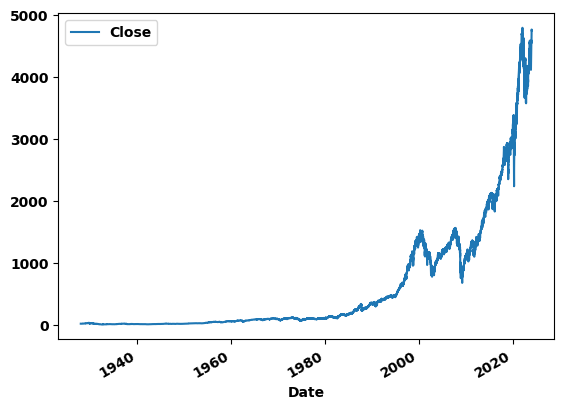

In [223]:
sp500.plot.line(y="Close", use_index=True)

In [224]:
# Cleaning & Visualizong Stock Market Data

In [225]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24111, freq=None)

In [226]:
# Clean up as these columns are only relevant for individual stocks but NOT for an index 

del sp500["Dividends"]
del sp500["Stock Splits"]

In [227]:
# Setting Up Target for Machine Learning
# Getting directionality for price instead of absolute price is ideal. Money is made based on the upward movement not the actual buy price.
# Will the stock go up or down tomorrow. use shift to push prices back one day

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [228]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000


In [229]:
sp500["Target"] = (sp500["Tomorrow"] >sp500["Close"]).astype(int) 

In [230]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1


In [231]:
# Remove historical data <1990 due to fundamental changes in the stock market
# Use .copy to avoid running into Pandas setting with copy warning when dataframe is being subset and later assigned back to it. 

sp500 = sp500.loc["1990-01-01":].copy()

In [232]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1


In [ ]:
# Above output: 1 = price went up, 0 = price went down

In [234]:
# TRAINING an Initial Machine learning Model using Random Forest Classifier (a good default), it 
# works by training a bunch of individual decision trees with randomized parameters and avearaging the results from the decision
# trees. Due to this, it is resistent to over-fitting. Can overfit but better than most other models to not overfit. 
# They run quickly and can pick up non-linear tendencies within the data. i.e., "open" price and "target" price
# can pick up non-linear relationships within the data.

from sklearn.ensemble import RandomForestClassifier

# Set this higher for better results but there is a max limit. N_estimators is the number of individual decision trees we want to train.
# min_sample split - protect against over-fitting, the higher the number the less accurate the model but the less it'll overfit
# setting random state at 1 - random forest is random, if we run the same model twice, the random numbers that are generated will be predictable each time.
# This is necessary for when you introduce new elements in an attempt to update/improve the model that the base model is stable and 
# does not change too wildly/randomly. This baseline will allow you to understand whether something you did improved the errors vs. something that is random. 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Time series data (can't use cross validation b/c it doesnt take the time series nature into account b/c it will take future data to predict the past, 
# also known as leakage, where the future data is leaked to the model). You will get amazing outcome in training but does not work in real-world.
# Train all rows, except last 100 rows. Last 100 rows will go in test set.

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# Be explicit about predictors by spelling it out. Be careful b/c you might use the Target colunn to predict the Target etc...hence why specify

predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fit the model, using predictor columns, to try and predict the Target

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [236]:
# How ACCURATE is the model, is it doing what we think it is doing?

from sklearn.metrics import precision_score

# Use preds (PRECISION SCORE) to calculate the rate of accuracy of the model. 
# Predict using test set with predictors to generate predictions

preds = model.predict(test[predictors])


In [237]:
preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [238]:
# above output: predictions are in Nympy array, which is hard to work with so convert this into a pandas series

import pandas as pd

preds = pd.Series(preds, index=test.index)

In [239]:
preds

Date
2023-08-03 00:00:00-04:00    0
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
2023-08-09 00:00:00-04:00    1
                            ..
2023-12-18 00:00:00-05:00    0
2023-12-19 00:00:00-05:00    0
2023-12-20 00:00:00-05:00    0
2023-12-21 00:00:00-05:00    0
2023-12-22 00:00:00-05:00    0
Length: 100, dtype: int32

In [240]:
precision_score(test["Target"], preds)

0.5441176470588235

In [89]:
# Above output: When it is predicted that price would go up, it actually went up 54% of the time, mildly better than chance.

In [241]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot: xlabel='Date'>

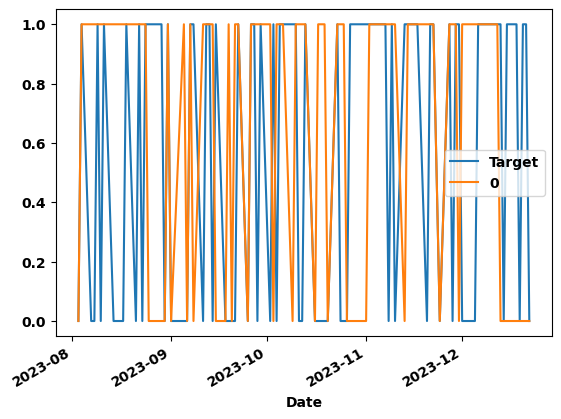

In [242]:
combined.plot()

In [92]:
# Above output: 0 is prediction and blue is actual. 

In [243]:
# Building a BACKTESTING SYSTEM (test for more than the last 100 days as per above (do it for multiple years)) = more confidence
# Wrap up predictions

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [244]:
# Take first 10y of data and predict value for the 11th year, then take the first 11 years of data to predict the 12th year and so on...
# Therefore, 2,500 is take first 10 years to train every year after (250) and so on.

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [245]:
predictions = backtest(sp500, model, predictors)

In [246]:
predictions["Predictions"].value_counts()

0    3465
1    2596
Name: Predictions, dtype: int64

In [247]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [248]:
# % of accuracy by days?

predictions["Target"].value_counts() / predictions.shape[0]

1    0.5344
0    0.4656
Name: Target, dtype: float64

In [249]:
# Let's improve the model now that we have confidence in our Backtesting by adding additional predictors to the model
# Build a variety if rolling averages
# New Predictors: Is today higher than yesterday, last week, last year etc). 2 (last 2 days),5 (last week),60 (3 months),250 (year),1000 (last 4 years)
# Then add to dataframe, take close and divide by the averages.

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
# Shift forward this time, find the rolling sum of the Target where the stock price actually went up. 

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
# Then add above to new predictors 

    new_predictors += [ratio_column, trend_column]

In [250]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.203954,529.0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1,0.992604,1.0,0.993476,3.0,1.061612,37.0,1.102599,134.0,1.185835,528.0


In [251]:
# Above output: NaN not enough data so just drop it

In [252]:
sp500 = sp500.dropna()

In [254]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.203954,529.0


In [260]:
# Update model slightly by adjusting parameters

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [256]:
# Get more control of the output of prediction by adjusting the threshold, instead of 1 or 0 (default set at 50%)
# Use .predict_proba to return the probability of stock price will go up, and adjust confidence % you want to work with. Let's try 60%

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [261]:
# Predictors such as Open, Closed etc. with absolute value was removed as it was not informative.
# Only the ratio is most informative, what is the price today compared to yesterday, compared to last week etc.

predictions = backtest(sp500, model, new_predictors)

In [262]:
predictions["Predictions"].value_counts()

0.0    4230
1.0     830
Name: Predictions, dtype: int64

In [263]:
precision_score(predictions["Target"], predictions["Predictions"])

0.572289156626506

In [ ]:
# Above output: This predictive value is good but could be better

In [160]:
# SUMMARY: 
# 1. Downloaded stock data, cleaned and visualised data
# 2. Set up Target
# 3. Trained initial model
# 4. Evaluated error and created backtested to measure the error over long periods of time
# 5. Model improvement with extra predictor columns

# FURTHER IMPROVEMENTS & LIMITATIONS:
# Add additional data - other overnight markets and markets are open before the sp500, news articles, macro conditions like interest 
# rate, oil, etc. leading and lagging indicators
# Look at micro level data etc. key stocks or sectors (tech)...
# 1) only shows a small snippet of the movement at a point in time (tomorrow) but it does not inform when to sell, Does not yet inform the general direction of the stock over time post 'tomorrow'